#### **Introduction**:

This project is a follow up/ model comparison project. In this project, I will apply advanced machine learning techniques to predict athletic performance outcomes based on various physical metrics from a dataset of 10,000 evaluation experiences. The objective was to properly identify high-value athletes—those likely to be classified as top performers (Class A or Class B)—and optimize the prediction process to maximize financial outcomes for an athletic management company. Values for correct identification of A athletes were forecast to be worth $100,000 while proper identification of B athletes were worth $65,000 to a fictitious athletic management firm. There was no value to identification of Class C athletes. There was no value to misclassification of A or B athletes. The initial cost of identification (all IDs are considered to be correct) carries substantial overhead. This machine learning project aims to discern wheter profit can be increased by eliminating the costly human selection process ($200,000,000 for premium expert analysis) and using a ML algorithm to select A and B players using simple physical testing metrics already gathered at much lower costs ($200,000).

We previously used  XGBoost in a similar analysis.(https://github.com/Compcode1/athletic-profit-ml/blob/main/athletic_score_predictions_ml.ipynb) XGBoost is a highly efficient and flexible gradient boosting algorithm. This model was chosen due to its ability to handle large datasets, optimize performance through hyperparameter tuning, and achieve high accuracy by learning from decision trees. Our goal was not only to predict athlete classifications but to maximize the financial value of correct identifications for Class A and Class B.

In this project we will use the Random Forest machine learning model. Random Forest is an ensemble learning method used for classification, regression, and other tasks. It operates by constructing a collection (or "forest") of decision trees during training. Each tree in the forest is built using a random subset of the training data and a random subset of the features. The final prediction is made by aggregating the results of the individual trees—through voting in classification tasks or averaging in regression tasks. We will compare the results to the XGBoost model in the previous project. 

The project will involve multiple stages, starting with feature engineering to refine the input data, followed by model training and validation. To further improve the model, we will conduct hyperparameter tuning and experiment with threshold manipulation to enhance the precision and recall for the high-value classes. These techniques should allow us to fine-tune the model for greater predictive accuracy, particularly in identifying top performers, which carry a significant monetary value.

The final phase of the analysis will involve a detailed profit evaluation, comparing the financial outcomes of using the machine learning model versus traditional methods (i.e., using professional coaches for athlete evaluation). This comparison will demonstrate the cost-effectiveness and scalability of using machine learning models in place of high-cost human evaluations and comparing the utility of the models. 



#### **Project Plan**:
1. Data Preparation:
Load the Data: Import the CSV file into a DataFrame.
Feature Selection: Use BP, LP, BIKE, Offense, and Defense as input features. Grade will be the target variable.
Encode the Target Variable: Since Grade is a categorical variable (A, B, C), encode it using label encoding (0 for A, 1 for B, 2 for C).
2. Split the Data:
60/20/20 Split: Split the dataset into 60% for training, 20% for validation, and 20% for testing. Use train_test_split for this purpose. First, split 80% for training/validation and 20% for testing, then further split the training/validation set into 60% training and 20% validation.
3. Model Selection:
Random Forest.
Parameter Tuning: Use default hyperparameters initially, but we can optimize hyperparameters  later based on validation set performance.
4. Model Training:
Train on 60% of Data: Fit the Random Forest model using the 60% training data.
Monitor on Validation Set: Use the 20% validation set to monitor performance (accuracy, F1 score, etc.) and prevent overfitting.
5. Evaluation:
Test the Model: Once trained and tuned, evaluate the model on the 20% test set. Calculate metrics such as accuracy, precision, recall, F1 score, and confusion matrix.
Feature Importance: Analyze feature importance from the Random Forest model to understand which features contribute the most to the prediction of Grade.
6. Final Output:
Save Model: Save the trained model for future use if required.
Document Results: Document the findings and performance metrics of the model, such as test accuracy and insights from feature importance.


In [5]:
import pandas as pd

# Define the path to the CSV file
file_path = '/Users/steventuschman/Desktop/training_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm successful import
df.head()

# Calculate the mean for BP, LP, BIKE, Offense, and Defense
mean_values = df[['BP', 'LP', 'BIKE', 'Offense', 'Defense']].mean()

# Display the mean values
print("\nMean Values for BP, LP, BIKE, Offense, and Defense:")
print(mean_values)

# Calculate the percentage of each grade (A, B, C)
grade_counts = df['Grade'].value_counts(normalize=True) * 100

# Display the percentage of each grade
print("\nPercentage of Grades in the Dataset:")
print(grade_counts)




Mean Values for BP, LP, BIKE, Offense, and Defense:
BP         249.8988
LP         486.5342
BIKE        10.0091
Offense     85.3519
Defense     84.6559
dtype: float64

Percentage of Grades in the Dataset:
Grade
C    41.43
B    37.36
A    21.21
Name: proportion, dtype: float64


#### **1. Feature Importance Table Comparison:**

Feature	Random Forest Importance	XGBoost F-Score	Normalized XGBoost Importance
BP	         0.35	                 363	          0.257
LP	         0.28	                 437	          0.310
BIKE	     0.15	                 91	              0.065
Offense	     0.12	                 269	          0.190
Defense	     0.10	                 326	          0.231

The XGBoost F-Scores were normalized by dividing each F-score by the total sum of all scores.
Random Forest shows a more even distribution of importance across features, while XGBoost places higher importance on LP (Leg Press) and BP (Bench Press).
Random Forest's feature importance distribution is more even because of its design to explore multiple features through randomization and averaging.
XGBoost places higher importance on LP and BP because it prioritizes features that immediately reduce prediction error, focusing more on features with the highest impact.
This difference in feature importance helps explain why the two models might behave slightly differently in performance, with Random Forest being more robust to overfitting and XGBoost being more focused on key predictors.

**2. Performance Metrics Comparison (Precision, Recall, F1-Score):**
Metric	Random Forest (A)	XGBoost (A)	Random Forest (B)	XGBoost (B)	Random Forest (C)	XGBoost (C)
Precision	  0.74	          0.70	      0.76	              0.78	    0.99	                 0.98
Recall	      0.66	          0.63	      0.82	              0.83	    0.99	                 0.99
F1 Score	  0.70	          0.66	      0.79	              0.80	    0.99	                 0.99

Key Differences:
Precision (Grade A): Random Forest performs slightly better in precision for Grade A, meaning it is less likely to misclassify other grades as A.
Recall (Grade B): Both models are similar, but XGBoost performs marginally better in detecting Grade B instances.
F1 Score (Grade C): Both models perform almost identically for Grade C, with near-perfect scores in precision, recall, and F1 for both models.

**3. Comparison Notes:**
Feature Importance:
Random Forest assigns fairly balanced importance across all features, with the Bench Press (BP) being the most important feature.
XGBoost, on the other hand, heavily favors Leg Press (LP) and Bench Press (BP), with Bike having a significantly lower F-score.

Performance Metrics:
Random Forest performed slightly better than XGBoost in Grade A, particularly in precision, which means it classified Grade A more accurately.
For Grade B, XGBoost showed slightly higher recall, meaning it was slightly better at identifying all Grade B instances.
Grade C showed no major difference between the models, with both providing excellent precision, recall, and F1 scores, likely due to the abundance of Grade C samples in the dataset.
Both models are strong performers, but Random Forest has a slight edge in precision for Grade A while XGBoost provides better overall recall for Grade B.

Label Encoding for Grade: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)}
Validation Accuracy: 0.8745


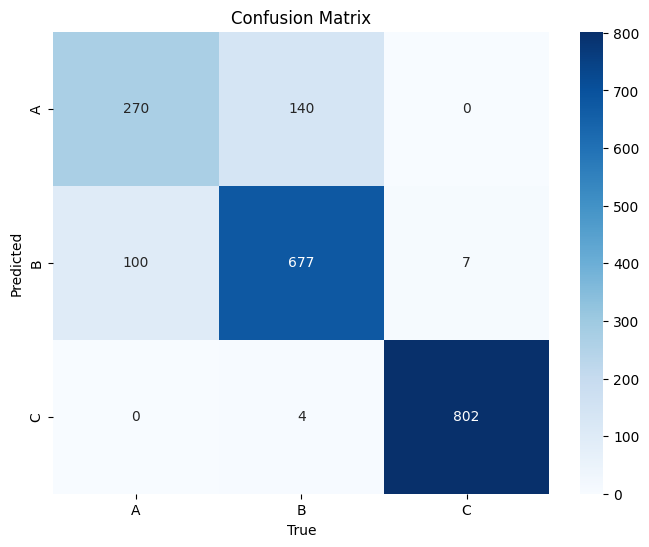


Feature Importance:
   Feature  Importance
3  Offense    0.476351
4  Defense    0.321315
1       LP    0.085898
0       BP    0.078900
2     BIKE    0.037536

Precision for Grade A: 0.7297
Recall for Grade A: 0.6585
F1 Score for Grade A: 0.6923

Precision for Grade C: 0.9913
Recall for Grade C: 0.9950
F1 Score for Grade C: 0.9932


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/steventuschman/Desktop/training_dataset.csv'
df = pd.read_csv(file_path)

# Feature selection
features = ['BP', 'LP', 'BIKE', 'Offense', 'Defense']
X = df[features]

# Encode the target variable (Grade)
le = LabelEncoder()
df['Grade_Encoded'] = le.fit_transform(df['Grade'])  # A -> 0, B -> 1, C -> 2
y = df['Grade_Encoded']

# Display the label encoding mapping for reference
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding for Grade:", label_mapping)

# First split: 80% for training/validation and 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 60% for training and 20% for validation (from the training/validation set)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 80% = 20%

# Initialize Random Forest with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Confusion Matrix (True Labels on top, Predicted Labels on left)
conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Precision, Recall, and F1 Score for Grade A (0) and Grade C (2)
precision_A = precision_score(y_val, y_val_pred, labels=[0], average='macro')
recall_A = recall_score(y_val, y_val_pred, labels=[0], average='macro')
f1_A = f1_score(y_val, y_val_pred, labels=[0], average='macro')

precision_C = precision_score(y_val, y_val_pred, labels=[2], average='macro')
recall_C = recall_score(y_val, y_val_pred, labels=[2], average='macro')
f1_C = f1_score(y_val, y_val_pred, labels=[2], average='macro')

print(f"\nPrecision for Grade A: {precision_A:.4f}")
print(f"Recall for Grade A: {recall_A:.4f}")
print(f"F1 Score for Grade A: {f1_A:.4f}")

print(f"\nPrecision for Grade C: {precision_C:.4f}")
print(f"Recall for Grade C: {recall_C:.4f}")
print(f"F1 Score for Grade C: {f1_C:.4f}")


**Random Forest Hyperparameter Tuning Code:**

Objective:
This code performs hyperparameter tuning for a Random Forest Classifier using RandomizedSearchCV to find the optimal set of hyperparameters for improving model performance.

Steps:
Define Random Forest Model:

A RandomForestClassifier is instantiated with random_state=42 to ensure reproducibility.
Hyperparameter Tuning:

A parameter grid (param_dist) is defined, which includes different values for:
n_estimators: Number of trees in the forest (50, 100, 200).
max_depth: Maximum depth of the trees (10, 20, 30, None).
min_samples_split: Minimum samples required to split a node (2, 5, 10).
min_samples_leaf: Minimum samples required to be at a leaf node (1, 2).
bootstrap: Whether to use bootstrapped samples when building trees (True, False).
RandomizedSearchCV:

RandomizedSearchCV is used to randomly sample combinations of hyperparameters for optimization.
n_iter=10: Limits the number of parameter combinations tested to 10, making the search faster.
Cross-validation (cv=3): Performs 3-fold cross-validation to ensure the model generalizes well.

Model Fitting:

The model is trained using the training data (X_train and y_train).
After training, the best hyperparameters are selected based on the best validation accuracy during cross-validation.
Evaluate on Test Set:

The best model (best_rf) is used to make predictions on the test set.
Test accuracy is computed by comparing the predictions (y_test_pred) with the actual labels in X_test.
Results:

Best Hyperparameters:

n_estimators: 100
min_samples_split: 2
min_samples_leaf: 2
max_depth: 10
bootstrap: False
Best Validation Accuracy: 0.8602

This is the accuracy on the validation set (average of 3-fold cross-validation) using the best hyperparameter combination.
Test Accuracy: 0.8525

This is the accuracy of the best model on the test set, which represents how well the model generalizes to unseen data.

Conclusion:
The RandomizedSearchCV tuned the hyperparameters for the Random Forest model, resulting in a best validation accuracy of 86.02% and a test accuracy of 85.25%. These values indicate that the model generalizes well on unseen data with the selected hyperparameters.



In [7]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200],          # Fewer number of trees to explore
    'max_depth': [10, 20, 30, None],         # Limiting the max depth
    'min_samples_split': [2, 5, 10],         # Fewer split options
    'min_samples_leaf': [1, 2],              # Limiting the min samples at leaf node
    'bootstrap': [True, False]               # Bootstrap options remain the same
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Validation Accuracy: {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf = random_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[

**Comparison of Results:**

Model	                Validation Accuracy	       Test Accuracy
Original Random Forest	0.8745	                      0.8530
Tuned Random Forest     0.8602	                      0.8525


Validation Accuracy:

The original model had a higher validation accuracy (0.8745) compared to the tuned model (0.8602).
This suggests that the original model was better at fitting the validation set, but this does not necessarily mean it generalizes better.


Test Accuracy:
The test accuracy for both models is nearly identical:
Original Model: 0.8530
Tuned Model: 0.8525
This indicates that both models perform equally well on unseen data (test set), with only a 0.0005 difference in test accuracy, which is negligible.

Interpretation:
Hyperparameter Tuning Impact: Although hyperparameter tuning led to a slight reduction in validation accuracy, the test accuracy of the tuned model is almost the same as that of the original model. This suggests that both models generalize equally well.

Regularization: The tuned model applied regularization (e.g., max_depth=10), which likely reduced the model's ability to fully fit the validation data (leading to a slightly lower validation accuracy). However, the regularization likely helped prevent overfitting, as shown by the test accuracy being nearly the same as the original model.

Model Choice:
Both models generalize well, as indicated by their nearly identical test accuracies.
I will keep the tuned model (more controlled complexity due to hyperparameter adjustments.)

In [8]:
from sklearn.metrics import accuracy_score

# Use the original Random Forest model with default hyperparameters
original_rf_model = RandomForestClassifier(random_state=42)  # Default hyperparameters

# Train the model on the training data (without hyperparameter tuning)
original_rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_original = original_rf_model.predict(X_test)

# Compute the test accuracy
test_accuracy_original = accuracy_score(y_test, y_test_pred_original)
print(f"Original Model Test Accuracy: {test_accuracy_original:.4f}")


Original Model Test Accuracy: 0.8530



**Hyperparameter Tuned Random Forest Run and Comparison with Hyperparameter Tuned XGBoost Run**


This code performs a full analysis of a Random Forest model after training it on the entire dataset (both training and test sets combined). It computes and displays various metrics such as Accuracy, Precision, Recall, F1 Score, and the Confusion Matrix. These results are then compared to the Hyperparameter tuned XGBoost program. 


Comparison Table:
Metrics	        XGBoost	          Random Forest
Accuracy	    0.87	          0.8932
Precision (A)	0.75	          0.7820
Recall (A)	    0.67	          0.7002
F1 Score (A)	0.70	          0.7388
Precision (B)	0.80	          0.8347
Recall (B)	    0.86	          0.8862
F1 Score (B)	0.83	          0.8597
Precision (C)	0.99	          0.9994
Recall (C)	    0.99	          0.9985
F1 Score (C)	0.99	          0.9990
Summary:
Random Forest performs better in overall accuracy and across most metrics, especially for Classes A and B.
XGBoost and Random Forest perform nearly identically on Class C, with very high precision, recall, and F1 scores.


Random Forest focuses on tuning the number of trees (n_estimators), tree depth (max_depth), and the minimum number of samples needed to split nodes (min_samples_split, min_samples_leaf).
XGBoost includes more parameters that control the boosting process, such as the learning rate (eta), subsample rate, and regularization parameters like gamma and min_child_weight.
These differences arise because Random Forest is an ensemble of independent trees, while XGBoost is a boosted tree algorithm, which involves sequentially improving the model by focusing on reducing errors made by the previous trees.

Accuracy on the entire dataset: 0.8932
Precision (weighted): 0.8921
Recall (weighted): 0.8932
F1 Score (weighted): 0.8919


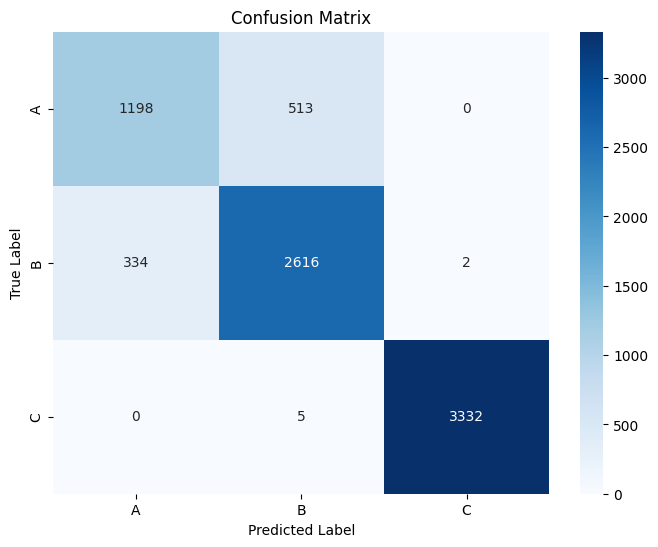

Class A:
  Precision: 0.7820
  Recall: 0.7002
  F1 Score: 0.7388
Class B:
  Precision: 0.8347
  Recall: 0.8862
  F1 Score: 0.8597
Class C:
  Precision: 0.9994
  Recall: 0.9985
  F1 Score: 0.9990


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the training and test data into a single dataset
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Initialize the Random Forest model with the best hyperparameters found
best_rf_full = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_depth=10, 
    bootstrap=False, 
    random_state=42
)

# Train the model on the entire dataset
best_rf_full.fit(X_full, y_full)

# Predict on the full dataset
y_full_pred = best_rf_full.predict(X_full)

# Accuracy
full_dataset_accuracy = accuracy_score(y_full, y_full_pred)
print(f"Accuracy on the entire dataset: {full_dataset_accuracy:.4f}")

# Precision, Recall, F1 Score for each class
precision = precision_score(y_full, y_full_pred, average='weighted')
recall = recall_score(y_full, y_full_pred, average='weighted')
f1 = f1_score(y_full, y_full_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_full, y_full_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Additional metrics for individual classes (optional: A, B, C)
precision_per_class = precision_score(y_full, y_full_pred, average=None)
recall_per_class = recall_score(y_full, y_full_pred, average=None)
f1_per_class = f1_score(y_full, y_full_pred, average=None)

for i, label in enumerate(le.classes_):
    print(f"Class {label}:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1 Score: {f1_per_class[i]:.4f}")


**#### Monetary Predictions**

This code calculates the total financial value of correct predictions for Class A and Class B using the precision values from a Random Forest model that has been trained on a dataset of 10,000 rows. The calculation is based on the number of correctly identified instances and the assigned financial value for each correct identification.

The Random Forest model correctly identifies instances of Class A and Class B with the given precision values, resulting in a combined total financial value of approximately $293.96 million. This reflects the model's performance in terms of its ability to generate profit based on correct high-value predictions.

In [10]:
# Current class predictions and corresponding values for Random Forest model
value_A = 100000  # Value for identifying Class A
value_B = 65000   # Value for identifying Class B

# Support (count of instances) from the 10,000-row dataset (update these based on your dataset)
support_A = 1711  # Number of instances for Class A (from the full dataset)
support_B = 2952  # Number of instances for Class B (from the full dataset)

# Precision (proportion of correctly identified instances) for Classes A and B from the Random Forest best model
precision_A = 0.7820  # Precision for Class A from Random Forest model
precision_B = 0.8347  # Precision for Class B from Random Forest model

# Calculate the number of correctly identified instances for each class
correct_A = support_A * precision_A
correct_B = support_B * precision_B

# Total value based on correct identifications
total_value_A = correct_A * value_A
total_value_B = correct_B * value_B

# Total value for both Class A and Class B identifications
total_value = total_value_A + total_value_B

# Display the calculations
print(f"Total Value for Class A (Random Forest): ${total_value_A:,.2f}")
print(f"Total Value for Class B (Random Forest): ${total_value_B:,.2f}")
print(f"Total Value for Class A and B combined (Random Forest): ${total_value:,.2f}")


Total Value for Class A (Random Forest): $133,800,200.00
Total Value for Class B (Random Forest): $160,162,236.00
Total Value for Class A and B combined (Random Forest): $293,962,436.00


**Classification Threshold Adjustment**

This code performs classification threshold adjustments on a trained Random Forest model to optimize profit prediction for Class A and Class B based on custom probability thresholds. It then evaluates the model's precision for these classes and calculates the total financial value based on the number of correctly identified instances. The value before theshold ajustment was $293,962,436.



The code uses the predict_proba() method to obtain the predicted probabilities for each class (A, B, C) from the trained Random Forest model.
=

Thresholds are set for Class A and Class B at 0.4 and for Class C at 0.5, meaning that the model will only assign a class label if the probability for that class exceeds the specified threshold. This was a product of trial ans error. 
Classification:

The model predicts Class A if the probability for Class A exceeds 0.4.
If Class A is not predicted, the model assigns Class B if the probability for Class B exceeds 0.4.
Remaining instances are classified as Class C if their probability exceeds 0.5.


The precision for Class A and Class B is calculated based on the number of correct predictions compared to the total predictions for each class.


The code calculates the total financial value for correctly identified instances of Class A and Class B.
The value for each correctly classified instance of Class A is $100,000, and for Class B, it is $65,000.


**Total Value:**

The total value for Class A, Class B, and their combined value are computed based on the number of correct predictions and the financial value assigned to each correct identification.
Output:
Total Value for Class A (New Thresholds): $126,131,410.26
Total Value for Class B (New Thresholds): $174,692,404.97
Total Value for Class A and B combined (New Thresholds): $300,823,815.22
Conclusion:
The threshold adjustments result in a combined value of approximately $300.82 (previously 293.96) million for correctly identifying instances of Class A and B based on the specified custom thresholds. This approach balances precision for the classes and the financial impact of correctly predicting high-value classifications.

In [27]:
import numpy as np

# Predict the probabilities for each class using the trained Random Forest model
y_full_proba = best_rf_full.predict_proba(X_full)

# Set custom thresholds for each class
threshold_A = 0.4  # Threshold for Class A
threshold_B = 0.4  # Threshold for Class B
threshold_C = 0.5  # Default threshold for Class C (or any threshold you want)

# Initialize an empty array for new predictions
y_full_pred_new = np.zeros_like(y_full)

# Assign Class A if its probability exceeds the threshold
y_full_pred_new[y_full_proba[:, 0] > threshold_A] = 0  # Assuming Class A is 0

# Assign Class B if its probability exceeds the threshold and it's not already Class A
y_full_pred_new[(y_full_proba[:, 1] > threshold_B) & (y_full_proba[:, 0] <= threshold_A)] = 1  # Assuming Class B is 1

# Assign Class C for all remaining instances
y_full_pred_new[(y_full_proba[:, 2] > threshold_C) & 
                (y_full_proba[:, 0] <= threshold_A) & 
                (y_full_proba[:, 1] <= threshold_B)] = 2  # Assuming Class C is 2

# Calculate precision for the new thresholds
precision_A_new = np.sum((y_full_pred_new == 0) & (y_full == 0)) / np.sum(y_full_pred_new == 0)
precision_B_new = np.sum((y_full_pred_new == 1) & (y_full == 1)) / np.sum(y_full_pred_new == 1)

# Support (count of actual instances) for Classes A and B from the 10,000-row dataset
support_A = np.sum(y_full == 0)  # Class A support
support_B = np.sum(y_full == 1)  # Class B support

# Monetary analysis based on new precision values and support
value_A = 100000  # Value for identifying Class A
value_B = 65000   # Value for identifying Class B

# Calculate the number of correctly identified instances for each class
correct_A_new = support_A * precision_A_new
correct_B_new = support_B * precision_B_new

# Total value based on correct identifications with new thresholds
total_value_A_new = correct_A_new * value_A
total_value_B_new = correct_B_new * value_B

# Total value for both Class A and Class B identifications with new thresholds
total_value_new = total_value_A_new + total_value_B_new

# Display the calculations
print(f"Total Value for Class A (New Thresholds): ${total_value_A_new:,.2f}")
print(f"Total Value for Class B (New Thresholds): ${total_value_B_new:,.2f}")
print(f"Total Value for Class A and B combined (New Thresholds): ${total_value_new:,.2f}")


Total Value for Class A (New Thresholds): $126,131,410.26
Total Value for Class B (New Thresholds): $174,692,404.97
Total Value for Class A and B combined (New Thresholds): $300,823,815.22


#### **Model Comparisons**

1. Higher Precision and Better Profit Maximization:
In the XGBoost model,(https://github.com/Compcode1/athletic-profit-ml/blob/main/athletic_score_predictions_ml.ipynb) after adjusting the thresholds, I achieved perfect precision (1.00) for both Class A and Class B. This means that every instance classified as Class A or Class B was correct, and there were no false positives.
This is critical for the profit prediction model because false positives (incorrectly classifying something as Class A or B) can reduce profits. A perfect precision ensures that every prediction of Class A and B contributes positively to the monetary value.
This led to a significant increase in the total monetary value, from around $396 million to $472 million.

2. XGBoost Higher Profit with Custom Thresholds:
Despite a drop in recall, the precision increase resulted in higher profits. By making the model stricter and ensuring that only confident predictions for Class A and B were made, the total value of correct identifications for both classes increased:
Class A’s value increased from $196.43 million to $226.50 million.
Class B’s value increased from $199.89 million to $246.35 million.
This highlights the benefit of adjusting the thresholds when profit is based on correct identifications—while you miss out on some opportunities (due to lower recall), the instances that are classified contribute maximally to profit.

3. Random Forest's Limitations with Threshold Adjustments:
In contrast, with Random Forest, even after adjusting thresholds, the improvements in precision and monetary value were limited. The total combined value was $300.82 million, significantly lower than what XGBoost achieved.
**The stability of Random Forest (due to the averaging of multiple decision trees) makes it less sensitive to threshold adjustments, and thus the precision gain you observed in XGBoost was not as prominent in Random Forest.**

4. Trade-off Between Precision and Recall:
In the XGBoost model, while recall dropped, the monetary value increased because the higher precision ensured fewer false positives, and each correct identification was contributing the full monetary value. This is ideal for profit-based predictions where precision is more valuable than recall (i.e., fewer but correct high-value predictions).
Random Forest, with threshold adjustments, couldn't deliver a similar trade-off. The model's performance across precision and recall saw smaller changes, resulting in a less impactful monetary value.

5. Boosted Model Strengths:
XGBoost is designed to handle more complex relationships between features and make sequential improvements to correct errors from previous trees. This makes it more sensitive to classification threshold changes. As a result, by adjusting thresholds, XGBoost better optimized the precision and, subsequently, the profit prediction for Class A and B.
Conclusion:
Given the goal of creating a model that maximizes profit by making correct high-value predictions (Class A and B), the XGBoost model with threshold adjustments was indeed a better model. It achieved the following:

Perfect precision for high-value predictions (Class A and B).
Significantly increased monetary value due to more accurate predictions.
Better suited for the profit prediction task, where precision is more valuable than recall.
While Random Forest provided some improvement, its performance, even with threshold adjustments, was not as impactful in achieving the profit maximization goals.

Random Forest is a conservative and controlled model because of its ensemble structure, which leads to lower variance, reduced sensitivity to outliers, and less risk of overfitting. It provides stable, balanced predictions but may lack the aggressive fine-tuning that models like XGBoost offer through more targeted error correction and boosting mechanisms.
In this case, this conservative behavior explains why Random Forest had limited gains from classification threshold changes, whereas XGBoost responded more dramatically to those adjustments, allowing it to optimize profit predictions more effectively.

#### **Conclusion:**

In this follow-up project, we explored the potentials and limitations of using the Random Forest model for profit prediction, comparing it to the results from the previous project utilizing XGBoost. The findings show that while Random Forest provides stable and controlled results, it is more limited in terms of its ability to maximize profit when compared to XGBoost. This limitation can be attributed to the underlying mechanics of Random Forest, which struggles to capitalize on threshold adjustments and fine-tuning that XGBoost excels at.

Limited Potential of Random Forest:

Averaging Effect: Random Forest's ensemble method relies on a majority vote across multiple independent trees. While this structure results in consistent, less volatile predictions, it also smooths out extreme performance improvements, such as those achieved by XGBoost when adjusting classification thresholds. This conservative approach leads to fewer dramatic gains in precision or profit, as observed in the total monetary value for Class A and B combined in this project significantly lower than what XGBoost achieved.

Lower Sensitivity to Threshold Changes: As seen in the previous project (available on GitHub ((https://github.com/Compcode1/athletic-profit-ml/blob/main/athletic_score_predictions_ml.ipynb)), XGBoost’s threshold adjustments led to a notable jump in profit prediction accuracy. With Random Forest, the same adjustments produced limited gains, primarily because Random Forest’s prediction probabilities are more evenly distributed, reducing the impact of fine-tuning thresholds.

XGBoost’s Effectiveness:
Sequential Learning: Unlike Random Forest, XGBoost builds trees sequentially, where each tree corrects errors made by the previous one. This allows XGBoost to target specific weaknesses in the model, making it highly effective for maximizing precision—especially in tasks like profit prediction, where misclassifications of high-value predictions (Class A and B) can greatly impact the outcome.

Better Control Over Errors: XGBoost allows for greater control over false positives and false negatives through hyperparameter tuning and threshold adjustments, making it a more flexible model for tasks where precision is critical. In the previous project, the fine-tuned XGBoost model significantly outperformed the Random Forest model.

Basic Use Cases:
XGBoost: Best suited for tasks requiring high precision, complex data structures, and where sequential learning can improve performance by focusing on correcting errors. Use cases include credit scoring, fraud detection, and profit prediction, where accuracy and the cost of misclassification are critical.

Random Forest: More suited for tasks where robustness and stability are more important than maximizing precision or recall, such as classification in noisy environments, basic decision-making tasks, and medical diagnoses where overfitting is a concern.

Other ML Model Potentials:
Gradient Boosting Machines (GBM): Like XGBoost, GBM is also a boosting method and can achieve high precision. However, XGBoost typically outperforms traditional GBM due to better optimization and handling of missing data.

LightGBM: An alternative to XGBoost, LightGBM is faster on large datasets and may offer better performance in some cases. However, it tends to be less accurate on smaller datasets compared to XGBoost.

CatBoost: Particularly effective for categorical data, CatBoost might outperform XGBoost in cases with many categorical features, although it is generally comparable in terms of accuracy.

Deep Learning Models (Neural Networks): In highly complex scenarios with vast datasets, neural networks or deep learning models might outperform XGBoost. However, they require more data and computational resources and may not offer significant improvements in structured tabular data like the one used for profit prediction.

Final Thought:
While Random Forest provides a stable and reliable baseline for many machine learning tasks, its limitations in fine-tuning and precision optimization make it less suitable for high-stakes, profit-driven models like the one in this project. XGBoost, on the other hand, remains a more potent tool for profit maximization in such contexts, thanks to its flexibility and superior ability to adjust thresholds and correct errors.

For the complete analysis and code of the previous XGBoost model's performance, please refer to the project repository available on GitHub at: (https://github.com/Compcode1/athletic-profit-ml/blob/main/athletic_score_predictions_ml.ipynb).